# Áñ´ÊÉÖÁõ∏ÂÖ≥‰∏≠ÊñáÊñ∞ÈóªÂàÜÊûê

 ## Êï∞ÊçÆÂä†ËΩΩ

In [17]:
import os
import json
import pandas as pd

# Êï∞ÊçÆÊñá‰ª∂Â§πË∑ØÂæÑ
news_data_dir = 'data/news/data/'
comment_data_dir = 'data/news/comment/'

# Âä†ËΩΩÊñ∞ÈóªÊï∞ÊçÆ
def load_news_data(data_dir):
    news_data = []
    files = sorted(os.listdir(data_dir))
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(data_dir, file), 'r', encoding='utf-8') as f:
                daily_news = json.load(f)
                for news in daily_news:
                    news_entry = {
                        'time': news.get('time', 'NULL'),
                        'title': news.get('title', 'NULL'),
                        'url': news.get('url', 'NULL'),
                        'content': news.get('meta', {}).get('content', 'NULL'),
                        'description': news.get('meta', {}).get('description', 'NULL'),
                        'keyword': news.get('meta', {}).get('keyword', 'NULL'),
                        'meta_title': news.get('meta', {}).get('title', 'NULL'),
                        'type': news.get('meta', {}).get('type', 'NULL')
                    }
                    news_data.append(news_entry)
    return pd.DataFrame(news_data)

# Âä†ËΩΩËØÑËÆ∫Êï∞ÊçÆ
def load_comment_data(data_dir):
    comment_data = []
    files = sorted(os.listdir(data_dir))
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(data_dir, file), 'r', encoding='utf-8') as f:
                daily_comments = json.load(f)
                for comment in daily_comments:
                    for com in comment.get('comment', []):
                        comment_entry = {
                            'news_time': comment.get('time', 'NULL'),
                            'news_title': comment.get('title', 'NULL'),
                            'news_url': comment.get('url', 'NULL'),
                            'comment_area': com.get('area', 'NULL'),
                            'comment_content': com.get('content', 'NULL'),
                            'comment_nickname': com.get('nickname', 'NULL'),
                            'comment_reply_to': com.get('reply_to', 'NULL'),
                            'comment_time': com.get('time', 'NULL')
                        }
                        comment_data.append(comment_entry)
    return pd.DataFrame(comment_data)

# Âä†ËΩΩÊï∞ÊçÆ
news_df = load_news_data(news_data_dir)
comment_df = load_comment_data(comment_data_dir)

# Â±ïÁ§∫Âä†ËΩΩÁöÑÊï∞ÊçÆ
print(f"Êñ∞ÈóªÊï∞ÊçÆÈïøÂ∫¶Ôºö{len(news_df)},ËØÑËÆ∫Êï∞ÊçÆÔºö{len(comment_df)}")

Êñ∞ÈóªÊï∞ÊçÆÈïøÂ∫¶Ôºö502550,ËØÑËÆ∫Êï∞ÊçÆÔºö1534616


In [2]:
news_df

time                                 title  \
0       01-01 00:00            ÊãÖÂøßÊÉÖÁª™Ê∂àÊï£ ÂïÜÂìÅÊúâÊúõËøéÊù•2016Âπ¥Êù•Ë°®Áé∞ÊúÄÂ•ΩÁöÑ‰∏ÄÂπ¥   
1       01-01 00:01              ÂõΩÊ≥∞ÂêõÂÆâË¥∫ÈùíÔºöÂ•ãËøõÊñ∞Êó∂‰ª£ ÂÖ±Âª∫ÂÅ•Â∫∑ÁπÅËç£ÁöÑËµÑÊú¨Â∏ÇÂú∫   
2       01-01 00:02                          Êñ∞‰∫¨Êä•Á§æËÆ∫ÔºöÁ©øË∂äÂ§ßÊ±üÂ§ßÊ≤≥   
3       01-01 00:03              ÁâπÊúóÊôÆÁ®éÊî∂‰ºòÊÉ†ÊîøÁ≠ñÂØπÁæéÂõΩË¥´Âõ∞Âú∞Âå∫Êàø‰ª∑ÂΩ±ÂìçËøë‰πé‰∏∫Èõ∂   
4       01-01 00:03                ÊûóÈÉëÔºöÈ¶ôÊ∏ØËøôÊîØÂçìË∂äË≠¶ÈòüÊòØÁâπÂå∫ÊîøÂ∫úÊúÄÂ§ßËµÑ‰∫ß‰πã‰∏Ä   
...             ...                                   ...   
502545  08-31 18:25           È∫íÈ∫üËäØÁâáÁªàÁªìÂØºËá¥ÁöÑËøûÈîÅÂèçÂ∫îÊòæÁé∞ÔºåÂçé‰∏∫Êóó‰∏ãÂ§öÁ≥ªÂàóÊâãÊú∫Ê∂®‰ª∑   
502546  08-31 19:15             Âàò‰ΩúËôéÂ∞ÜÊãÖ‰ªªÊ¨ßÂä†ÊéßËÇ°È´òÁ∫ßÂâØÊÄªË£Å ‰∏ÄÂä†CEOË∫´‰ªΩ‰∏çÂèò   
502547  08-31 14:00  ‰ø°ÈÄöÈô¢Ôºö2020Á¨¨‰∫åÂ≠£Â∫¶Âõ∫ÂÆöÂÆΩÂ∏¶ÊúàÊà∑ÂùáÊîØÂá∫‰∏∫35.7ÂÖÉ ÂêåÊØî‰∏ãÈôç1.7%   
502548  08-31 19:06     ‰∏ÄÂä†ÂõûÂ∫î‚ÄúÂàò‰ΩúËôéÂõûÂΩíOPPO‚ÄùÔºöÂàò‰ΩúËôéÊòØ‰∏ÄÂä†ÂàõÂßã‰∫∫ÂíåCEOË∫´‰ªΩ‰∏çÂèò   
502549  08-31 22:00                      5GËøòÊ≤°Áî®‰∏ä 4GÂç¥Ë∂äÊù•Ë∂äÊÖ¢‰∫ÜÔºü   

                                                      url  \
0       https://finance.sina.com.cn/stock/usstock/c/20...   
1       https://finance.sina.com.cn/stock/roll/2020-01...   
2       https://news.sina.com.cn/c/2020-01-01/doc-iihn...   
3       https://finance.sina.com.cn/stock/usstock/c/20...   
4       https://news.sina.com.cn/c/2020-01-01/doc-iihn...   
...                                                   ...   
502545  https://tech.sina.com.cn/t/2020-08-31/doc-iivh...   
502546  https://tech.sina.com.cn/t/2020-08-31/doc-iivh...   
502547  https://tech.sina.com.cn/t/2020-08-31/doc-iivh...   
502548  https://tech.sina.com.cn/t/2020-08-31/doc-iivh...   
502549  https://tech.sina.com.cn/t/2020-09-01/doc-iivh...   

                                                  content  \
0       Â§ßÂÆóÂïÜÂìÅÂ∞ÜÂàõ‰∏ãËá™2016Âπ¥‰ª•Êù•ÁöÑÊúÄ‰Ω≥Âπ¥Â∫¶Ë°®Áé∞ÔºåÂéüÊ≤πÂà∞ÈìúÁöÑÂπ¥Â∫¶Êî∂ÁõäÂ∞ÜÊúâÊâÄÂ¢ûÈïø„ÄÇ ÂΩ≠ÂçöÂïÜÂìÅÊåáÊï∞Âàõ...   
1       ÂõΩÊ≥∞ÂêõÂÆâÂÖöÂßî‰π¶ËÆ∞Ë¥∫ÈùíÔºöÂ•ãËøõÊñ∞Êó∂‰ª£ ÂÖ±Âª∫ÊåÅÁª≠ÂÅ•Â∫∑ÁπÅËç£ÁöÑËµÑÊú¨Â∏ÇÂú∫ Ë¥∫Èùí ÂõΩÊ≥∞ÂêõÂÆâËØÅÂà∏ ‚ÄúÂÖöÁöÑÂçÅ‰πù...   
2       ÂéüÊ†áÈ¢òÔºöÁ©øË∂äÂ§ßÊ±üÂ§ßÊ≤≥ Êó∂ÂÖâ‰∏çÊÅãËøáÂæÄÔºåÂ§ßÊ±üÊ∞∏ËøúÂ•îËÖæ„ÄÇ‰Ω†Â•ΩÔºå2020Âπ¥ÔºÅ‰Ω†Â•ΩÔºå‰∏ã‰∏Ä‰∏™ÂçÅÂπ¥ÔºÅ ÂΩì2...   
3       Êñ∞Êµ™ÁæéËÇ°1Êúà1Êó•ËÆØ ÁæéÂõΩÊÄªÁªüÁâπÊúóÊôÆÊõæÁªèÂº∫Ë∞ÉÔºåË¢´Êñ∞ÂáèÁ®éÊîøÁ≠ñÈÄâ‰∏≠ÁöÑ‰ΩéÊî∂ÂÖ•Âú∞Âå∫Êàø‰ª∑‚ÄúÈ£ôÂçá‚ÄùÔºåËØÅÊòé‰ªñ...   
4       ÂéüÊ†áÈ¢òÔºöÊñ∞Âπ¥Ââç‰∏ÄÂ§©ÔºåÊûóÈÉëÂú®Ë≠¶ÊÄªÂëäËØâË≠¶ÈòüÔºöÁõ∏‰ø°Ê≠£‰πâÁ´ôÂú®Êàë‰ª¨‰∏ÄËæπÔºÅ ÊûóÈÉëÊúàÂ®•ËØ¥ÔºåÈ¶ôÊ∏ØËøôÊîØÂçìË∂äÁöÑË≠¶...   
...                                                   ...   
502545  ÂéüÊ†áÈ¢òÔºöÈ∫íÈ∫üËäØÁâáÊàñ‚ÄúÁªùÁâà‚Äù ÂçéÂº∫ÂåóÊúâÁªèÈîÄÂïÜÁÉ≠ÁÇíÂçé‰∏∫ÊâãÊú∫ÔºöÊê≠ËΩΩÈ∫íÈ∫üËäØÁâáÁöÑÊôÆÊ∂®300 ÊØèÁªèËÆ∞ËÄÖ ...   
502546  Êñ∞Êµ™ÁßëÊäÄËÆØ 8Êúà31Êó•ÊôöÈó¥Ê∂àÊÅØÔºåÈíàÂØπ‰∏ÄÂä†CEOÂ∞ÜÂõûÂΩíOPPOÁöÑÊ∂àÊÅØÔºåOPPOÊñπÈù¢Ë°®Á§∫ÔºåÂàò‰ΩúËôé...   
502547  Êñ∞Êµ™ÁßëÊäÄËÆØ 8Êúà31Êó•‰∏ãÂçàÊ∂àÊÅØÔºå‰∏≠ÂõΩ‰ø°ÊÅØÈÄö‰ø°Á†îÁ©∂Èô¢Êó•ÂâçÂèëÂ∏É„Ää‰∏≠ÂõΩÂÆΩÂ∏¶ËµÑË¥πÊ∞¥Âπ≥Êä•Âëä„ÄãÊòæÁ§∫Ôºå20...   
502548  Áõ∏ÂÖ≥Êñ∞ÈóªÔºö‰∏ÄÂä†ÂàõÂßã‰∫∫Âàò‰ΩúËôéÂõûÂΩíOPPOÂá∫‰ªªÈ´òÁ∫ßÂâØÊÄªË£Å Â∞ÜÊéåËàµ‰∫ßÂìÅÁ∫ø 36Ê∞™Ëé∑ÊÇâÔºåÊ≠§ÂâçÊ∂àÊÅØÁß∞Ôºå...   
502549  Êù•Ê∫êÔºöÊûÅÂÆ¢ÂÖ¨Âõ≠ 4GÂèòÊÖ¢Ôºå‰∏çÊòØ5GÁöÑ„ÄåÈîÖ„ÄçÔºåËá≥Â∞ë‰∏çÂÖ®ÊòØ„ÄÇ ÊúÄËøë4GÁöÑÁΩëÁªú‰ΩìÈ™åË∂äÊù•Ë∂ä‰∏çÂ∞ΩÂ¶Ç‰∫∫ÊÑè...   

                                              description          keyword  \
0                              ÊãÖÂøßÊÉÖÁª™Ê∂àÊï£ ÂïÜÂìÅÊúâÊúõËøéÊù•2016Âπ¥Êù•Ë°®Áé∞ÊúÄÂ•ΩÁöÑ‰∏ÄÂπ¥               []   
1                                ÂõΩÊ≥∞ÂêõÂÆâË¥∫ÈùíÔºöÂ•ãËøõÊñ∞Êó∂‰ª£ ÂÖ±Âª∫ÂÅ•Â∫∑ÁπÅËç£ÁöÑËµÑÊú¨Â∏ÇÂú∫     [ËµÑÊú¨Â∏ÇÂú∫, ÂõΩÊ≥∞ÂêõÂÆâ]   
2       Ê±üÂ§ßÊ≤≥Êó∂ÂÖâ‰∏çÊÅãËøáÂæÄÔºåÂ§ßÊ±üÊ∞∏ËøúÂ•îËÖæ„ÄÇ‰Ω†Â•ΩÔºå2020Âπ¥ÔºÅ‰Ω†Â•ΩÔºå‰∏ã‰∏Ä‰∏™ÂçÅÂπ¥ÔºÅÂΩì2019Âπ¥Â∫ïÊñ∞ÂºÄÈÄöÁöÑ...             [ÂÖÉÊó¶]   
3                                ÁâπÊúóÊôÆÁ®éÊî∂‰ºòÊÉ†ÊîøÁ≠ñÂØπÁæéÂõΩË¥´Âõ∞Âú∞Âå∫Êàø‰ª∑ÂΩ±ÂìçËøë‰πé‰∏∫Èõ∂ 

In [3]:
comment_df

news_time                    news_title  \
0        01-01 00:03      ÁâπÊúóÊôÆÁ®éÊî∂‰ºòÊÉ†ÊîøÁ≠ñÂØπÁæéÂõΩË¥´Âõ∞Âú∞Âå∫Êàø‰ª∑ÂΩ±ÂìçËøë‰πé‰∏∫Èõ∂   
1        01-01 00:03        ÊûóÈÉëÔºöÈ¶ôÊ∏ØËøôÊîØÂçìË∂äË≠¶ÈòüÊòØÁâπÂå∫ÊîøÂ∫úÊúÄÂ§ßËµÑ‰∫ß‰πã‰∏Ä   
2        01-01 00:03        ÊûóÈÉëÔºöÈ¶ôÊ∏ØËøôÊîØÂçìË∂äË≠¶ÈòüÊòØÁâπÂå∫ÊîøÂ∫úÊúÄÂ§ßËµÑ‰∫ß‰πã‰∏Ä   
3        01-01 00:03        ÊûóÈÉëÔºöÈ¶ôÊ∏ØËøôÊîØÂçìË∂äË≠¶ÈòüÊòØÁâπÂå∫ÊîøÂ∫úÊúÄÂ§ßËµÑ‰∫ß‰πã‰∏Ä   
4        01-01 00:03        ÊûóÈÉëÔºöÈ¶ôÊ∏ØËøôÊîØÂçìË∂äË≠¶ÈòüÊòØÁâπÂå∫ÊîøÂ∫úÊúÄÂ§ßËµÑ‰∫ß‰πã‰∏Ä   
...              ...                           ...   
1534611  03-08 22:29  5GÊâãÊú∫ÂØÜÈõÜ‰∏äÂ∏ÇÔºöOPPOÂÆö‰ª∑5499ÂÖÉËµ∑ÔºåÂ§çÂ∑•ÁéáËææÂÖ´Êàê   
1534612  03-08 22:29  5GÊâãÊú∫ÂØÜÈõÜ‰∏äÂ∏ÇÔºöOPPOÂÆö‰ª∑5499ÂÖÉËµ∑ÔºåÂ§çÂ∑•ÁéáËææÂÖ´Êàê   
1534613  03-08 22:29  5GÊâãÊú∫ÂØÜÈõÜ‰∏äÂ∏ÇÔºöOPPOÂÆö‰ª∑5499ÂÖÉËµ∑ÔºåÂ§çÂ∑•ÁéáËææÂÖ´Êàê   
1534614  03-08 22:29  5GÊâãÊú∫ÂØÜÈõÜ‰∏äÂ∏ÇÔºöOPPOÂÆö‰ª∑5499ÂÖÉËµ∑ÔºåÂ§çÂ∑•ÁéáËææÂÖ´Êàê   
1534615  03-08 22:29  5GÊâãÊú∫ÂØÜÈõÜ‰∏äÂ∏ÇÔºöOPPOÂÆö‰ª∑5499ÂÖÉËµ∑ÔºåÂ§çÂ∑•ÁéáËææÂÖ´Êàê   

                                                  news_url comment_area  \
0        https://finance.sina.com.cn/stock/usstock/c/20...         Á¶èÂª∫Ê≥âÂ∑û   
1        https://news.sina.com.cn/c/2020-01-01/doc-iihn...         ÊπñÂåóÈªÑÁü≥   
2        https://news.sina.com.cn/c/2020-01-01/doc-iihn...      ÈÉëÂ∑ûÂ§ßÂ≠¶Êñ∞Ê†°Âå∫   
3        https://news.sina.com.cn/c/2020-01-01/doc-iihn...         ÊµôÊ±üÊù≠Â∑û   
4        https://news.sina.com.cn/c/2020-01-01/doc-iihn...         ÊµôÊ±üÊù≠Â∑û   
...                                                    ...          ...   
1534611  https://tech.sina.com.cn/t/2020-03-09/doc-iimx...         ÊπñÂåóÂ≠ùÊÑü   
1534612  https://tech.sina.com.cn/t/2020-03-09/doc-iimx...         Âπø‰∏úÊ∑±Âú≥   
1534613  https://tech.sina.com.cn/t/2020-03-09/doc-iimx...         ÂÆâÂæΩËöåÂü†   
1534614  https://tech.sina.com.cn/t/2020-03-09/doc-iimx...         ÁîòËÇÉÂÖ∞Â∑û   
1534615  https://tech.sina.com.cn/t/2020-03-09/doc-iimx...         Â±±Ë•øÈïøÊ≤ª   

                      comment_content comment_nickname comment_reply_to  \
0                 ÁúãÁúãÊ∂àË¥πÊ∞¥Âπ≥Â∞±Áü•ÈÅì‰∫ÜÔºåÂï•‰πüÂà´ËØ¥‰∫ÜÂêßÔºüÔºÅ   ÊâãÊú∫Áî®Êà∑3177568030                    
1                         È¶ôÊ∏ØÁöÑÊòéÂ§©‰ºöÊõ¥Âä†ÁæéÂ•ΩÔºÅ        Â§öÁëôÊ≤≥Áïî‰∏äÁöÑÊú®Â∏ÜËàπ                    
2              Ê∏ØË≠¶‰Ω†‰ª¨ËæõËã¶‰∫ÜÔºåÁ•ùÊàë‰ª¨‰ºüÂ§ßÁöÑÊ∏ØË≠¶ËäÇÊó•Âø´‰πê‰πêÔºÅ     Áî®Êà∑6351207983                    
3                                  ÂÜçËµû            ÁâõÁâõ‰ªñÁàπÂú∞                    
4                                   üëç            ÁâõÁâõ‰ªñÁàπÂú∞                    
...                               ...              ...              ...   
1534611                          Âä†Ê≤πÂçö‰∏ª        Ëã±ÈõÑ‰∏çÈóÆÂá∫Â§Ñ1‰∫íÂÖ≥                    
1534612  ÂûÉÂúæoppo  ËøòÂçñ5000+  ‰ªÄ‰πàÁãóÁé©ÊÑèÈÉΩËÉΩÂÅöÈ´òÁ´Ø‰∫Ü         ÂºÄ‰∏™‰ºöÂëòÊîπ‰∏™Âêç‰∏∂                    
1534613                        Â§çÂ∑•ÁéáÂï•ÊÑèÊÄù            ‰∏áÂπ¥Â∞èÁ±≥Á±≥                    
1534614                           Â§™Ë¥µ‰∫Ü         Â∞èÊ≤êÊ≤êÂÆ∂ÁöÑÁãóËõãÂÑø                    
1534615                        ÊúüÂæÖËãπÊûú5G            MrÈªÑÊâçÂçé                    

                comment_time  
0        2020-01-01 05:04:25  
1        2020-01-01 13:52:51  
2        2020-01-01 13:51:01  
3        2020-01-01 13:43:40  
4        2020-01-01 13:43:30  
...                      ...  
1534611  2020-03-09 18:57:05  
1534612  2020-03-09 18:11:09  
1534613  2020-03-09 18:02:02  
1534614  2020-03-09 17:36:31  
1534615  2020-03-09 16:56:14  

[1534616 rows x 8 columns]

## Êñ∞ÈóªÁÉ≠ÁÇπËøΩË∏™

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ËÆæÁΩÆÂÖ®Â±ÄÂ≠ó‰ΩìÂíåÊ†∑Âºè
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14 
plt.rcParams['font.family'] = ['Times New Roman', 'SimHei']

1. Êñ∞ÈóªÊó∂Èó¥ÂàÜÂ∏ÉÁªüËÆ°

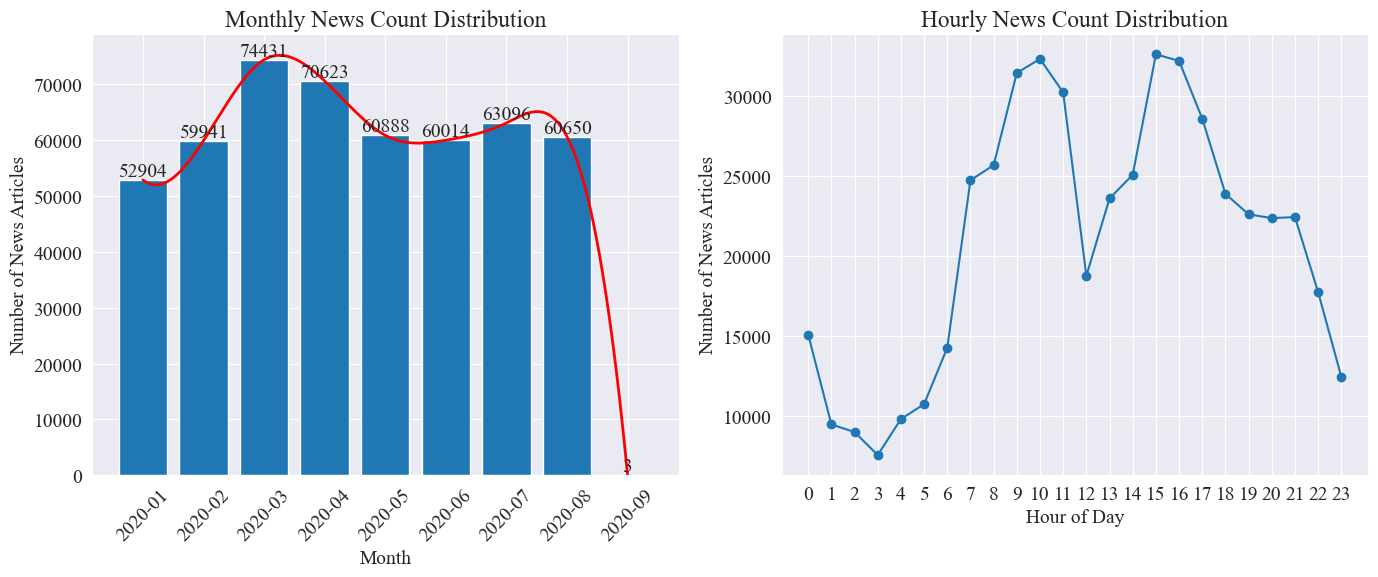

In [51]:
from collections import Counter
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import numpy as np

# ÊèêÂèñÊó•ÊúüÂíåÂ∞èÊó∂‰ø°ÊÅØ
dates = []
hours = []

for time_str in news_df['time']:
    try:
        time_obj = datetime.strptime('2020-' + time_str, '%Y-%m-%d %H:%M')
        dates.append(time_obj.strftime('%Y-%m'))  # ÊèêÂèñÂπ¥‰ªΩÂíåÊúà‰ªΩ
        hours.append(time_obj.hour)
    except ValueError:
        pass

# ÁªüËÆ°ÊØèÊúàÊñ∞ÈóªÊï∞Èáè
monthly_news_count = Counter(dates)
monthly_news_count = dict(sorted(monthly_news_count.items()))

# ÁªüËÆ°ÊØèÂ∞èÊó∂Êñ∞ÈóªÊï∞Èáè
hourly_news_count = Counter(hours)
hourly_news_count = dict(sorted(hourly_news_count.items()))

# ÁªòÂà∂ÊØèÊúàÊñ∞ÈóªÊï∞ÈáèÂàÜÂ∏ÉÊü±Áä∂Âõæ
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
months = list(monthly_news_count.keys())
news_counts = list(monthly_news_count.values())
bars = plt.bar(months, news_counts, label='Monthly News Count')
plt.xlabel('Month')
plt.ylabel('Number of News Articles')
plt.title('Monthly News Count Distribution')
plt.xticks(rotation=45)

# Âú®Êü±Â§¥‰∏äÊ†áÂá∫ÂÖ∑‰ΩìÊï∞ÊçÆ
for bar, count in zip(bars, news_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, count,
             ha='center', va='bottom')

# ÁªòÂà∂Ëøë‰ººÊõ≤Á∫ø
x = np.arange(len(months))
y = news_counts
spl = UnivariateSpline(x, y, s=100)
xs = np.linspace(0, len(months) - 1, 500)
ys = spl(xs)
plt.plot(xs, ys, 'r', lw=2, label='Smoothed Curve')

# ÁªòÂà∂ÊØèÂ∞èÊó∂Êñ∞ÈóªÊï∞ÈáèÂàÜÂ∏ÉÊäòÁ∫øÂõæ
plt.subplot(1, 2, 2)
plt.plot(list(hourly_news_count.keys()), list(hourly_news_count.values()), marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of News Articles')
plt.title('Hourly News Count Distribution')
plt.xticks(list(hourly_news_count.keys()))

plt.tight_layout()
plt.show()

2. Êñ∞ÈóªÂÖ≥ÈîÆËØçÊï∞ÈáèÁªüËÆ°

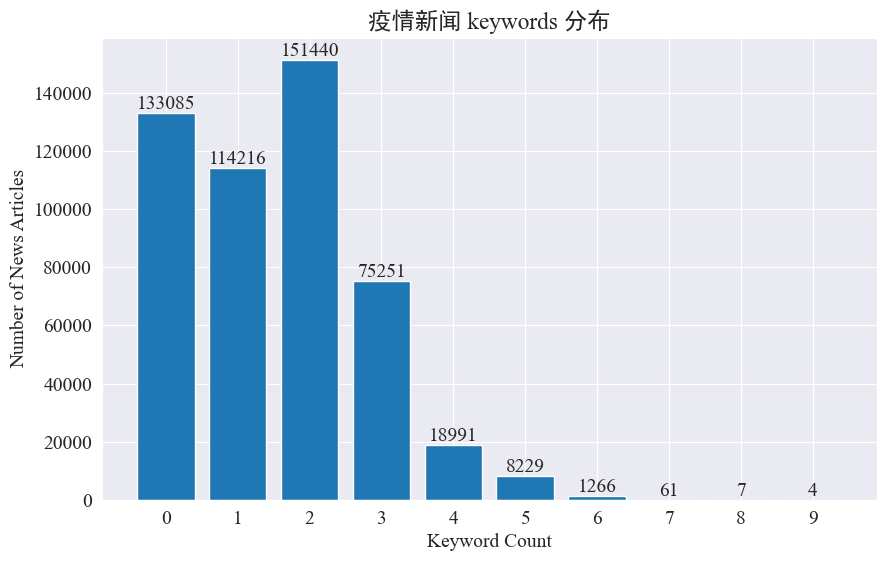

In [5]:
# ÂàõÂª∫keyword_countÂàóË°®
keyword_count = [len(news['keyword']) if isinstance(news['keyword'], list) else 0 for news in news_df.to_dict('records')]

# ËÆ°ÁÆóÂÖ≥ÈîÆËØçÊï∞ÈáèÁöÑÂàÜÂ∏É
keyword_count_distribution = pd.Series(keyword_count).value_counts().sort_index()

# ÁªòÂà∂Êü±Áä∂Âõæ
plt.figure(figsize=(10, 6))
bars = plt.bar(keyword_count_distribution.index, keyword_count_distribution.values)

# Âú®ÊØè‰∏™Êü±Â§¥‰∏äÊ†áÂá∫ÂÖ∑‰ΩìÊï∞Èáè
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Keyword Count')
plt.ylabel('Number of News Articles')
plt.title('Áñ´ÊÉÖÊñ∞Èóª keywords ÂàÜÂ∏É')
plt.xticks(keyword_count_distribution.index)
plt.show()

In [53]:
import jieba
import jieba.analyse

def extract_keywords(text):
    # Âü∫‰∫éjiebaÁöÑtextrankÁÆóÊ≥ïÂÆûÁé∞
    keywords = jieba.analyse.textrank(text,topK=5,withWeight=True)
    return ' '.join([keyword[0] for keyword in keywords])

news_df['keyword_new'] =news_df['content'].map(lambda x: extract_keywords(x))
keyword_data = news_df[['time','keyword','keyword_new']]
keyword_data

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.425 seconds.
Prefix dict has been built successfully.


time          keyword       keyword_new
0       01-01 00:00               []    Ë°∞ÈÄÄ Â∫ìÂ≠ò È£éÈô© Âá∫Áé∞ ÂïÜÂìÅ
1       01-01 00:01     [ËµÑÊú¨Â∏ÇÂú∫, ÂõΩÊ≥∞ÂêõÂÆâ]    Â∏ÇÂú∫ ËµÑÊú¨ Ë°å‰∏ö ÂèëÂ±ï ÂÖ®Èù¢
2       01-01 00:02             [ÂÖÉÊó¶]    ÁªèÊµé ÂéÜÂè≤ ÁîüÊ¥ª Â§ßÊ±ü ÊøÄËç°
3       01-01 00:03               []    Êàø‰ª∑ Á†îÁ©∂ ÊòØÂê¶ Êé™ÊñΩ ÂèëÁé∞
4       01-01 00:03           [ÊûóÈÉëÊúàÂ®•]    È¶ôÊ∏Ø Ë≠¶ÂØü Ë≠¶Èòü ÊúàÂ®• Áõ∏‰ø°
...             ...              ...               ...
502545  08-31 18:25       [È∫íÈ∫üËäØÁâá, Âçé‰∏∫]   ËäØÁâá È∫íÈ∫ü ÊâãÊú∫ ÂçäÂØº‰Ωì ËÆ∞ËÄÖ
502546  08-31 19:15  [Âàò‰ΩúËôé, ‰∏ÄÂä†, OPPO]  Ê¨ßÂä† ÊâãÊú∫ ÊéßËÇ° ÊúâÈôêÂÖ¨Âè∏ ‰∫ßÂìÅ
502547  08-31 14:00  [‰ø°ÈÄöÈô¢, ÂÆΩÂ∏¶, ÁßªÂä®Êï∞ÊçÆ]    ËµÑË¥π ÁßªÂä® ÂÆΩÂ∏¶ ‰∏≠ÂõΩ Ê∞¥Âπ≥
502548  08-31 19:06  [‰∏ÄÂä†, Âàò‰ΩúËôé, OPPO]  ÂâØÊÄªË£Å ÂàõÂßã‰∫∫ Ê¨ßÂä† ÂõûÂΩí Âá∫‰ªª
502549  08-31 22:00         [5G, 4G]   ÁΩëÁªú ËøêËê•ÂïÜ Áî®Êà∑ ÁΩëÈÄü Â¢ûÈïø

[502550 rows x 3 columns]

In [57]:
import os

# Á°Æ‰øùÁõÆÂΩïÂ≠òÂú®
output_dir = './data/news/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# ‰øùÂ≠òDataFrameÂà∞CSVÊñá‰ª∂
output_file_path = os.path.join(output_dir, 'keyword_data.csv')
keyword_data.to_csv(output_file_path, index=False, encoding='utf-8')


In [59]:
# ÂêàÂπ∂Âπ∂ÂéªÈô§ÈáçÂ§çÁöÑËØç
def merge_keywords(row):
    # Â∞ÜkeywordÂàóÂíåkeyword_newÂàóÂêàÂπ∂
    keywords = set(row['keyword']) | set(row['keyword_new'].split())
    return ' '.join(keywords)

keyword_data['merged_keywords'] = keyword_data.apply(merge_keywords, axis=1)
keyword_data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5756\1548194266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_data['merged_keywords'] = keyword_data.apply(merge_keywords, axis=1)


time          keyword       keyword_new  \
0       01-01 00:00               []    Ë°∞ÈÄÄ Â∫ìÂ≠ò È£éÈô© Âá∫Áé∞ ÂïÜÂìÅ   
1       01-01 00:01     [ËµÑÊú¨Â∏ÇÂú∫, ÂõΩÊ≥∞ÂêõÂÆâ]    Â∏ÇÂú∫ ËµÑÊú¨ Ë°å‰∏ö ÂèëÂ±ï ÂÖ®Èù¢   
2       01-01 00:02             [ÂÖÉÊó¶]    ÁªèÊµé ÂéÜÂè≤ ÁîüÊ¥ª Â§ßÊ±ü ÊøÄËç°   
3       01-01 00:03               []    Êàø‰ª∑ Á†îÁ©∂ ÊòØÂê¶ Êé™ÊñΩ ÂèëÁé∞   
4       01-01 00:03           [ÊûóÈÉëÊúàÂ®•]    È¶ôÊ∏Ø Ë≠¶ÂØü Ë≠¶Èòü ÊúàÂ®• Áõ∏‰ø°   
...             ...              ...               ...   
502545  08-31 18:25       [È∫íÈ∫üËäØÁâá, Âçé‰∏∫]   ËäØÁâá È∫íÈ∫ü ÊâãÊú∫ ÂçäÂØº‰Ωì ËÆ∞ËÄÖ   
502546  08-31 19:15  [Âàò‰ΩúËôé, ‰∏ÄÂä†, OPPO]  Ê¨ßÂä† ÊâãÊú∫ ÊéßËÇ° ÊúâÈôêÂÖ¨Âè∏ ‰∫ßÂìÅ   
502547  08-31 14:00  [‰ø°ÈÄöÈô¢, ÂÆΩÂ∏¶, ÁßªÂä®Êï∞ÊçÆ]    ËµÑË¥π ÁßªÂä® ÂÆΩÂ∏¶ ‰∏≠ÂõΩ Ê∞¥Âπ≥   
502548  08-31 19:06  [‰∏ÄÂä†, Âàò‰ΩúËôé, OPPO]  ÂâØÊÄªË£Å ÂàõÂßã‰∫∫ Ê¨ßÂä† ÂõûÂΩí Âá∫‰ªª   
502549  08-31 22:00         [5G, 4G]   ÁΩëÁªú ËøêËê•ÂïÜ Áî®Êà∑ ÁΩëÈÄü Â¢ûÈïø   

                     merged_keywords  
0                     Ë°∞ÈÄÄ È£éÈô© Âá∫Áé∞ ÂïÜÂìÅ Â∫ìÂ≠ò  
1           ÂÖ®Èù¢ ËµÑÊú¨Â∏ÇÂú∫ Ë°å‰∏ö Â∏ÇÂú∫ ÂèëÂ±ï ËµÑÊú¨ ÂõΩÊ≥∞ÂêõÂÆâ  
2                  ÂÖÉÊó¶ ÁªèÊµé ÊøÄËç° ÂéÜÂè≤ ÁîüÊ¥ª Â§ßÊ±ü  
3                     ÂèëÁé∞ Á†îÁ©∂ Êàø‰ª∑ ÊòØÂê¶ Êé™ÊñΩ  
4                Ë≠¶Èòü ÊûóÈÉëÊúàÂ®• Ë≠¶ÂØü Áõ∏‰ø° ÊúàÂ®• È¶ôÊ∏Ø  
...                              ...  
502545       È∫íÈ∫üËäØÁâá È∫íÈ∫ü ËÆ∞ËÄÖ ËäØÁâá ÊâãÊú∫ ÂçäÂØº‰Ωì Âçé‰∏∫  
502546  Âàò‰ΩúËôé ÊéßËÇ° ‰∫ßÂìÅ ‰∏ÄÂä† ÊâãÊú∫ OPPO ÊúâÈôêÂÖ¨Âè∏ Ê¨ßÂä†  
502547       ‰ø°ÈÄöÈô¢ Ê∞¥Âπ≥ ‰∏≠ÂõΩ ÂÆΩÂ∏¶ ËµÑË¥π ÁßªÂä® ÁßªÂä®Êï∞ÊçÆ  
502548  ÂâØÊÄªË£Å Âá∫‰ªª Âàò‰ΩúËôé ÂõûÂΩí ÂàõÂßã‰∫∫ ‰∏ÄÂä† OPPO Ê¨ßÂä†  
502549         Â¢ûÈïø ËøêËê•ÂïÜ Áî®Êà∑ ÁΩëÈÄü ÁΩëÁªú 4G 5G  

[502550 rows x 4 columns]

In [65]:
from datetime import datetime, timedelta
# Â∞ÜÊó∂Èó¥ËΩ¨Êç¢‰∏∫datetimeÊ†ºÂºèÂπ∂Âä†‰∏ä2020Âπ¥
keyword_data['time'] = pd.to_datetime('2020-' + keyword_data['time'], format='%Y-%m-%d %H:%M')

# ÂêàÂπ∂keywordÂíåkeyword_newÔºåÂéªÈáç
def merge_keywords(row):
    merged = set(row['keyword']) | set(row['keyword_new'].split())
    return ' '.join(merged)

keyword_data['merged_keywords'] = keyword_data.apply(merge_keywords, axis=1)

# ÊåâÊó∂Èó¥ÊéíÂ∫è
keyword_data = keyword_data.sort_values(by='time')

# ËÆ°ÁÆóÊªöÂä®È¢ëÁéá
def get_rolling_keyword_freq(df, window=7):
    rolling_keyword_freq = []
    for i in range(len(df)):
        start_time = df.iloc[i]['time'] - timedelta(days=window)
        end_time = df.iloc[i]['time']
        mask = (df['time'] > start_time) & (df['time'] <= end_time)
        recent_data = df.loc[mask]
        keywords = ' '.join(recent_data['merged_keywords']).split()
        keyword_counter = Counter(keywords)
        top_keywords = keyword_counter.most_common(20)
        rolling_keyword_freq.append(dict(top_keywords))
    return rolling_keyword_freq

keyword_data['rolling_keyword_freq'] = get_rolling_keyword_freq(keyword_data)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5756\254832503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_data['time'] = pd.to_datetime('2020-' + keyword_data['time'], format='%Y-%m-%d %H:%M')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5756\254832503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_data['merged_keywords'] = keyword_data.apply(merge_keywords, axis=1)


In [71]:
keyword_df = pd.DataFrame(keyword_data['rolling_keyword_freq'].tolist()).fillna(0)
keyword_df = keyword_df.astype(int)

# Â∞ÜÂéüÂßãÁöÑÊó∂Èó¥ÂàóÂêàÂπ∂Âà∞Êñ∞ÁöÑDataFrame‰∏≠
result_df = pd.concat([keyword_data['time'], keyword_df], axis=1)

# ‰øùÂ≠ò‰∏∫CSVÊñá‰ª∂
result_df.to_csv('./data/news/output/keyword_frequency.csv', index=False)

print(result_df.head())

                 time  Ë°∞ÈÄÄ  È£éÈô©  Âá∫Áé∞  ÂïÜÂìÅ  Â∫ìÂ≠ò  ÂÖ®Èù¢  ËµÑÊú¨Â∏ÇÂú∫  Ë°å‰∏ö  Â∏ÇÂú∫  ...  Ë¥£‰ªªÁºñËæë  Ëß£ËØª  \
0 2020-01-01 00:00:00   1   1   1   1   1   0     0   0   0  ...     0   0   
1 2020-01-01 00:01:00   1   1   1   1   1   1     1   1   1  ...     0   0   
2 2020-01-01 00:02:00   1   1   1   1   1   1     1   1   1  ...     0   0   
3 2020-01-01 00:03:00   1   1   1   1   1   1     1   1   1  ...     0   0   
4 2020-01-01 00:03:00   1   1   1   1   1   1     1   1   1  ...     0   0   

   Á≤æÂáÜ  Ë¥¢Áªè  ÊîøÂ∫ú  Ë≠¶ÂØü  Êµ∑Âçó  Ê£ÄÊµã  ËØÅÂà∏  ÁæéÂÖÉ  
0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0  

[5 rows x 148 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13260\3392989910.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data.groupby('date').sum().reset_index()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13260\3392989910.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(daily_data.columns[1:])).colors
MovieWriter imagemagick unavailable; using Pillow instead.


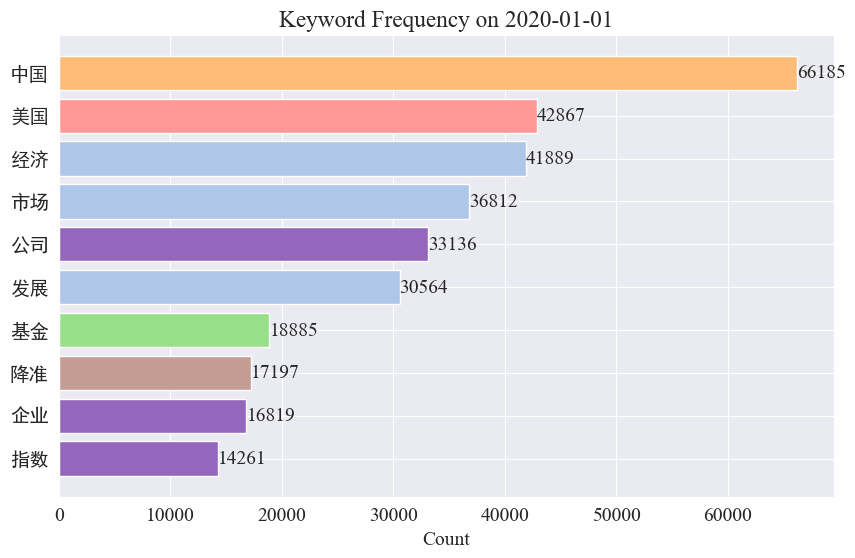

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pyecharts.charts import Bar
from pyecharts import options as opts
from random import randint

# ËØªÂèñÊï∞ÊçÆ
file_path = './data/news/output/keyword_frequency.csv'
data = pd.read_csv(file_path, parse_dates=['time'])

# ËÅöÂêàÊï∞ÊçÆÔºåÊåâÊó•ÊúüÂêàÂπ∂ÁªüËÆ°
data['date'] = data['time'].dt.date
daily_data = data.groupby('date').sum().reset_index()

# ÂáÜÂ§áÈ¢úËâ≤ÂàóË°®ÔºåÁ°Æ‰øùÊØè‰∏™ÂÖ≥ÈîÆËØçÈÉΩÊúâ‰∏çÂêåÁöÑÈ¢úËâ≤
colors = plt.cm.get_cmap('tab20', len(daily_data.columns[1:])).colors
color_dict = {keyword: colors[i] for i, keyword in enumerate(daily_data.columns[1:])}

def update(frame):
    plt.clf()
    date = daily_data['date'].iloc[frame]
    day_data = daily_data[daily_data['date'] == date].drop('date', axis=1).T
    day_data.columns = ['count']
    day_data = day_data.sort_values(by='count', ascending=False).head(10)
    
    bars = plt.barh(day_data.index, day_data['count'], color=[color_dict[keyword] for keyword in day_data.index])
    plt.xlabel('Count')
    plt.title(f'Keyword Frequency on {date}')
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')
    plt.gca().invert_yaxis()

# ÂàõÂª∫Âä®Áîª
fig = plt.figure(figsize=(10, 6))
anim = FuncAnimation(fig, update, frames=len(daily_data), repeat=False)

# ‰øùÂ≠òÂä®Áîª
anim.save('keyword_trend.gif', writer='imagemagick')
